## Импорт библиотек

In [253]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')


from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
import plotly.express as px
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering, SpectralClustering, KMeans

import scipy.cluster.hierarchy as sch
from matplotlib import pyplot

from sklearn.metrics import f1_score, silhouette_score, calinski_harabasz_score, davies_bouldin_score, confusion_matrix, accuracy_score, rand_score

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

%matplotlib inline

## Загрузка данных

In [255]:
country_df = pd.read_csv('Country-data.csv')

## Разведочный анализ

In [257]:
country_df

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


### Описание набора данных

• country: Название страны.

• child_mort: Уровень детской смертности (количество смертей детей до 5 лет на 1000 рождений).

• exports: Доля экспорта в ВВП страны (в процентах).

• health: Расходы на здравоохранение как процент от ВВП страны.

• imports: Доля импорта в ВВП страны (в процентах).

• income: Доход на душу населения (в долларах США).

• inflation: Уровень инфляции в стране (в процентах).

• life_expec: Ожидаемая продолжительность жизни при рождении (в годах).

• total_fer: Общий коэффициент фертильности (среднее количество детей, рожденных одной женщиной за всю жизнь).

• gdpp: ВВП на душу населения (в долларах США).

In [260]:
country_df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


аномальных значений в датасете не обнаружено

In [262]:
country_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


датасет включает 160 значений и 10 колонок. Данные в основном имеют числовой формат, но также встечается тип object в столбце c названием страны

In [264]:
country_df.isna().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

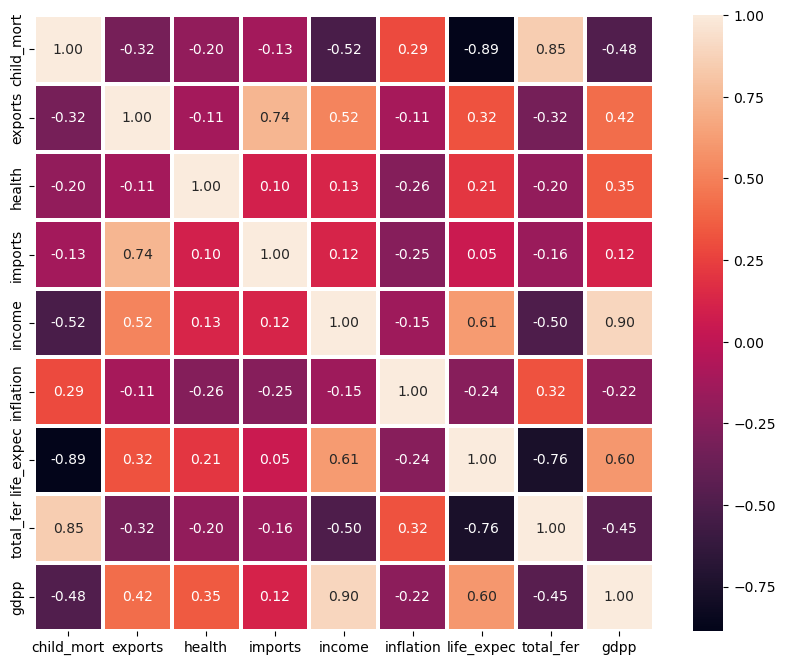

In [265]:
plt.figure(figsize=(10,8))
sns.heatmap(country_df[['child_mort',	'exports',	'health',	'imports',	'income',	'inflation',	'life_expec', 'total_fer',	'gdpp']].corr(), annot=True, linewidths=1.5 , fmt = '.2f');

наблюдается сильная зависимость между доходом и ввп на душу населения. Детская смертность коррелирует с рождаемостью и обратно коррелирует
с продолжительностью жизни в стране.

## Кластеризация

In [268]:
X = country_df.iloc[:, [1, 2, 3, 4, 5, 6, 7, 8, 9]]

### Метод главных компонент для упрощения визуализации данных

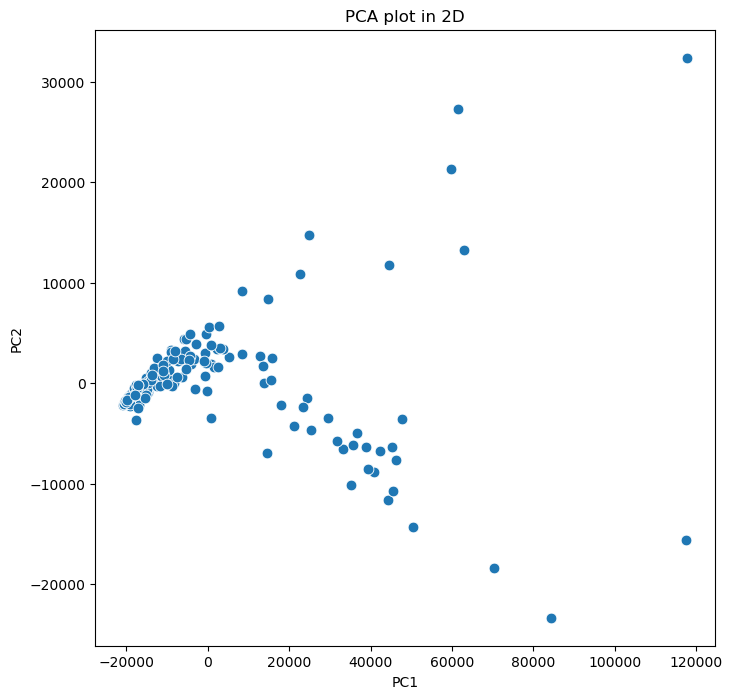

In [270]:
principal_df = pd.DataFrame(data = PCA(n_components=2).fit_transform(X))
    
fig = plt.figure(figsize=(8, 8))
sns.scatterplot(x = principal_df.iloc[:,0], 
                y = principal_df.iloc[:,1], 
                s=60)

plt.title('PCA plot in 2D')
plt.xlabel('PC1')
plt.ylabel('PC2');

In [271]:
def PCAplot3D(x_data, y_data=None):
    components = PCA(n_components=3).fit_transform(x_data)

    fig = px.scatter_3d(
        components, 
        x=0, y=1, z=2, 
        color=y_data, 
        size=0.1*np.ones(len(X)), 
        opacity = 1,
        title='PCA plot in 3D',
        labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'},
        width=900, height=900
    )
    fig.show()

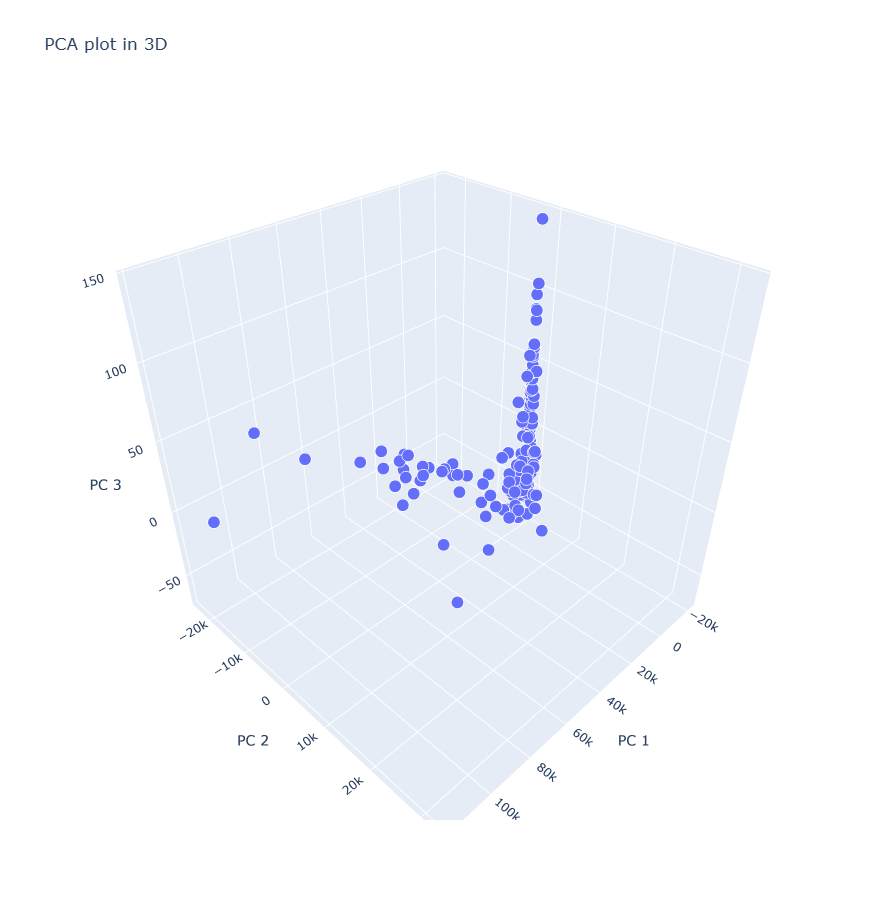

In [272]:
PCAplot3D(X)

In [273]:
scores = []
values = np.arange(2, 6)

for num_clusters in values:
    # Train the KMeans clustering model
    kmeans = KMeans(init='k-means++', n_clusters=num_clusters, n_init=10)
    kmeans.fit(X)
    score = silhouette_score(X, kmeans.labels_, 
                metric='euclidean', sample_size=len(X))

    print("\nNumber of clusters =", num_clusters)
    print("Silhouette score =", score)
                    
    scores.append(score)


Number of clusters = 2
Silhouette score = 0.7256314906273206

Number of clusters = 3
Silhouette score = 0.7003508054481692

Number of clusters = 4
Silhouette score = 0.6109297437247546

Number of clusters = 5
Silhouette score = 0.573477344327287


#### берем 3 клатера

#### Выбранные методы класторизации:

K-Means

Agglomerative Clustering

Spectral Clustering

### Метод k-средних (k-means)

In [278]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(X)

In [279]:
pca = PCA(n_components=2)

In [280]:
kmeans = KMeans(n_clusters=3, random_state=42, n_init='auto').fit(X)
centroids_pca = pca.fit_transform(kmeans.cluster_centers_)
pred_k = kmeans.labels_

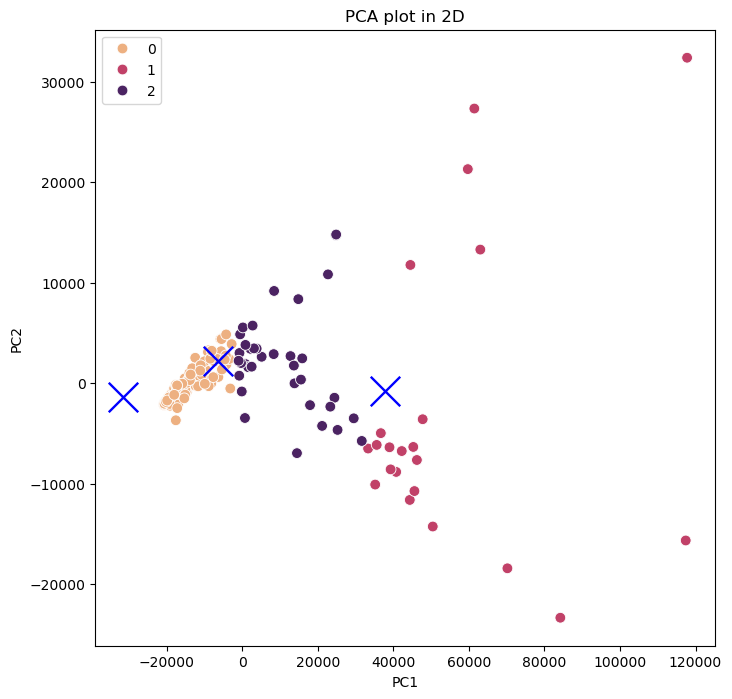

In [281]:
fig = plt.figure(figsize=(8, 8))
sns.scatterplot(x = principal_df.iloc[:,0], 
                y = principal_df.iloc[:,1], 
                hue = pred_k, 
                palette="flare", 
                s=60)
sns.scatterplot(x = centroids_pca[:,0], 
                y =  centroids_pca[:,1],  
                marker="x", 
                s=450, 
                color = 'blue')
plt.title('PCA plot in 2D')
plt.xlabel('PC1')
plt.ylabel('PC2');

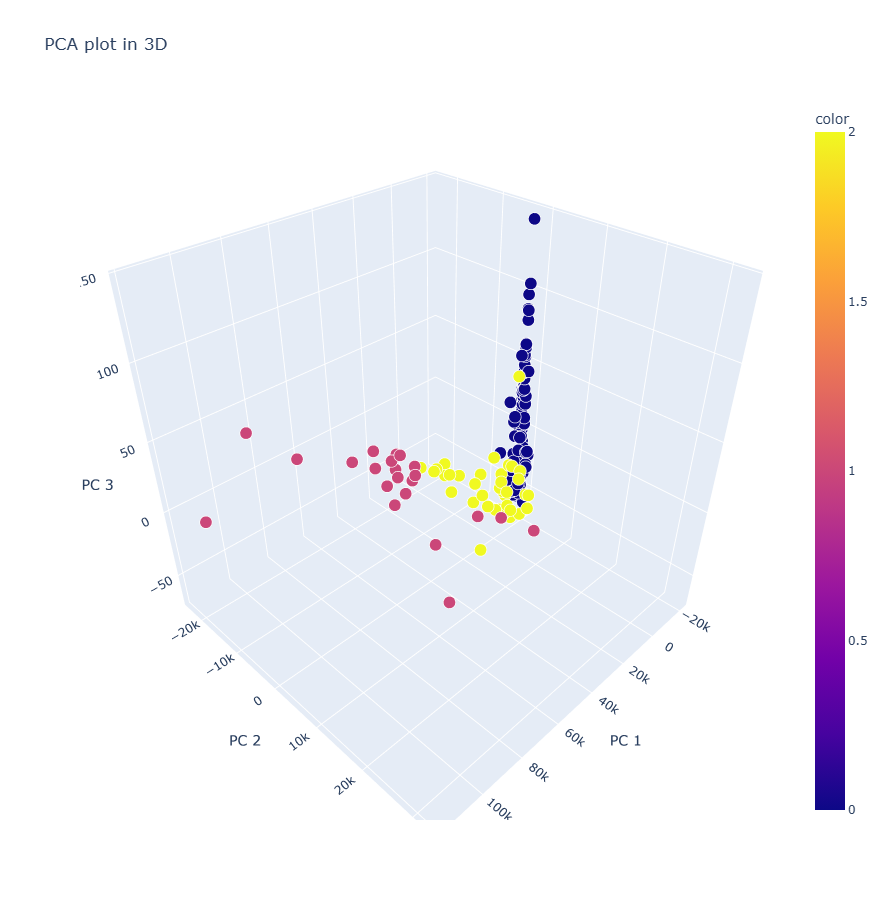

In [282]:
PCAplot3D(X, pred_k)

In [283]:
kmeans_calinski = calinski_harabasz_score(X, kmeans_labels)

print('calinski_harabasz_score: ' + str(kmeans_calinski))

calinski_harabasz_score: 311.7348890778243


### Иерархическая агломеративная кластеризация (AgglomerativeClustering)

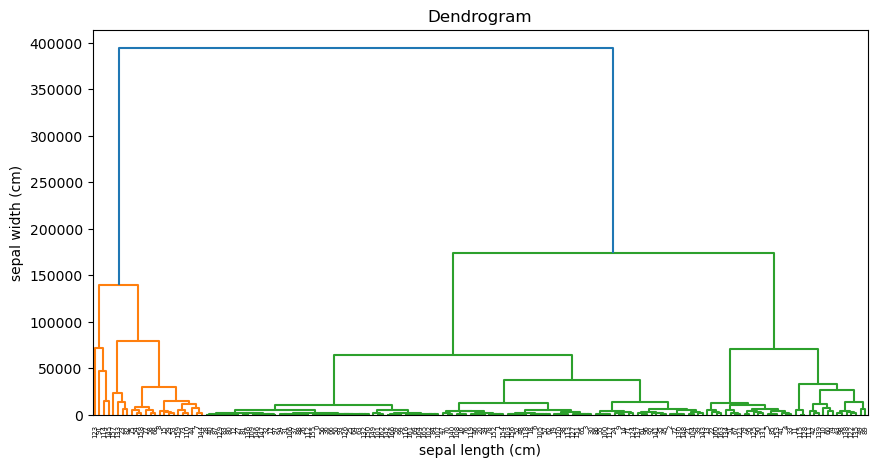

In [285]:
pyplot.figure(figsize=(10, 5))
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.show()

In [286]:
agglo = AgglomerativeClustering(n_clusters=3)
agglo_labels = agglo.fit_predict(X)

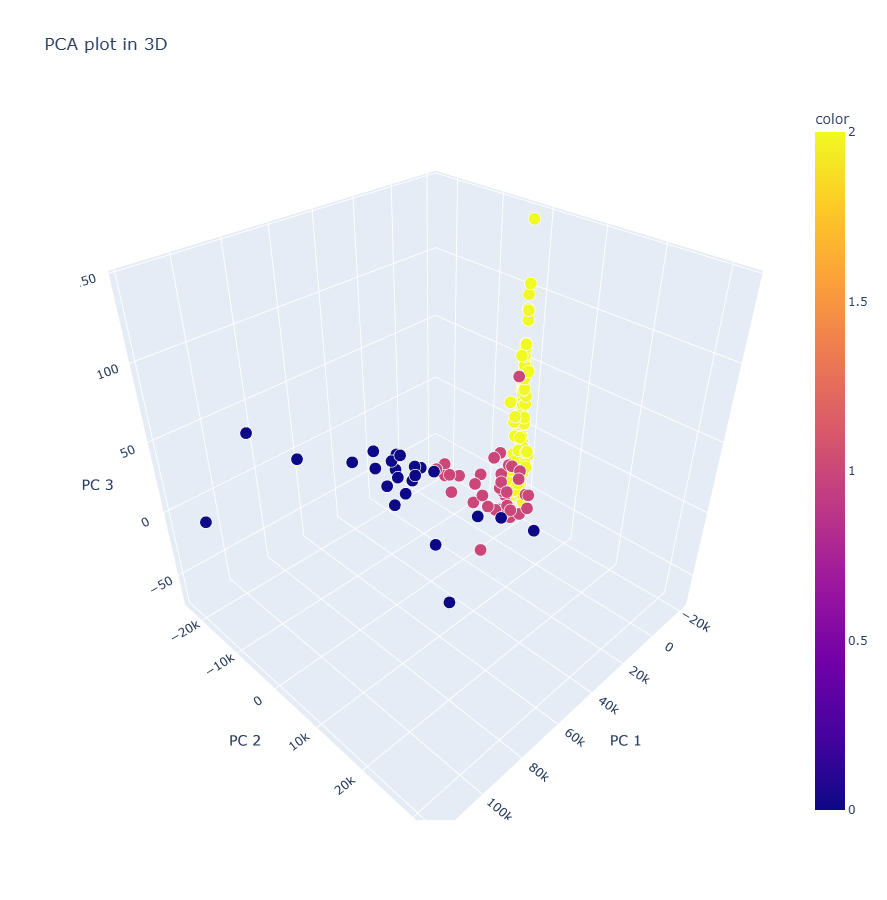

In [287]:
PCAplot3D(X, agglo_labels)

In [288]:
agglo_calinski = calinski_harabasz_score(X, agglo_labels)

print('calinski_harabasz_score: ' + str(agglo_calinski))

calinski_harabasz_score: 309.2944523367777


### Спектральная кластеризация (Spectral Clustering)

In [290]:
clustering_sp = SpectralClustering(3).fit(X)
pred_sp = clustering_sp.labels_

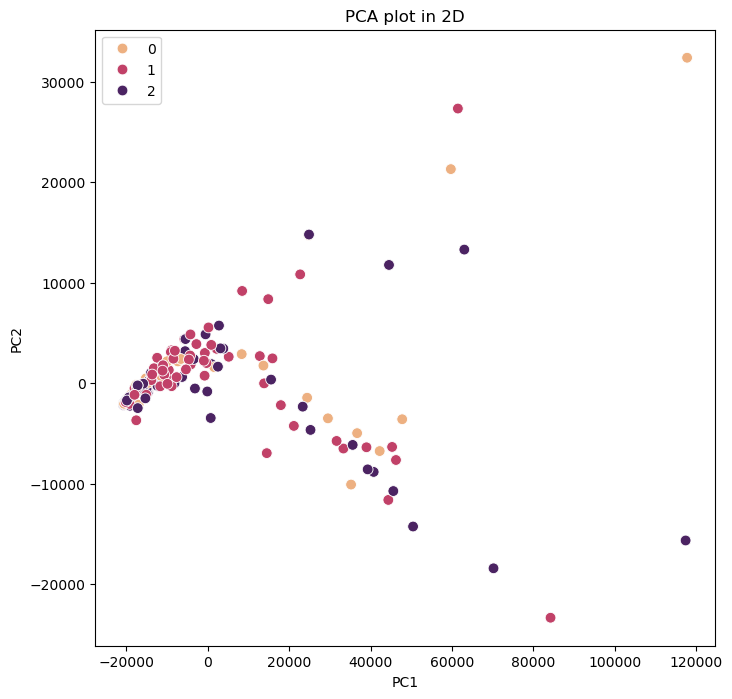

In [291]:
fig = plt.figure(figsize=(8, 8))
sns.scatterplot(x = principal_df.iloc[:,0], 
                y = principal_df.iloc[:,1], 
                hue = pred_sp, 
                palette="flare", 
                s=60)
plt.title('PCA plot in 2D')
plt.xlabel('PC1')
plt.ylabel('PC2');

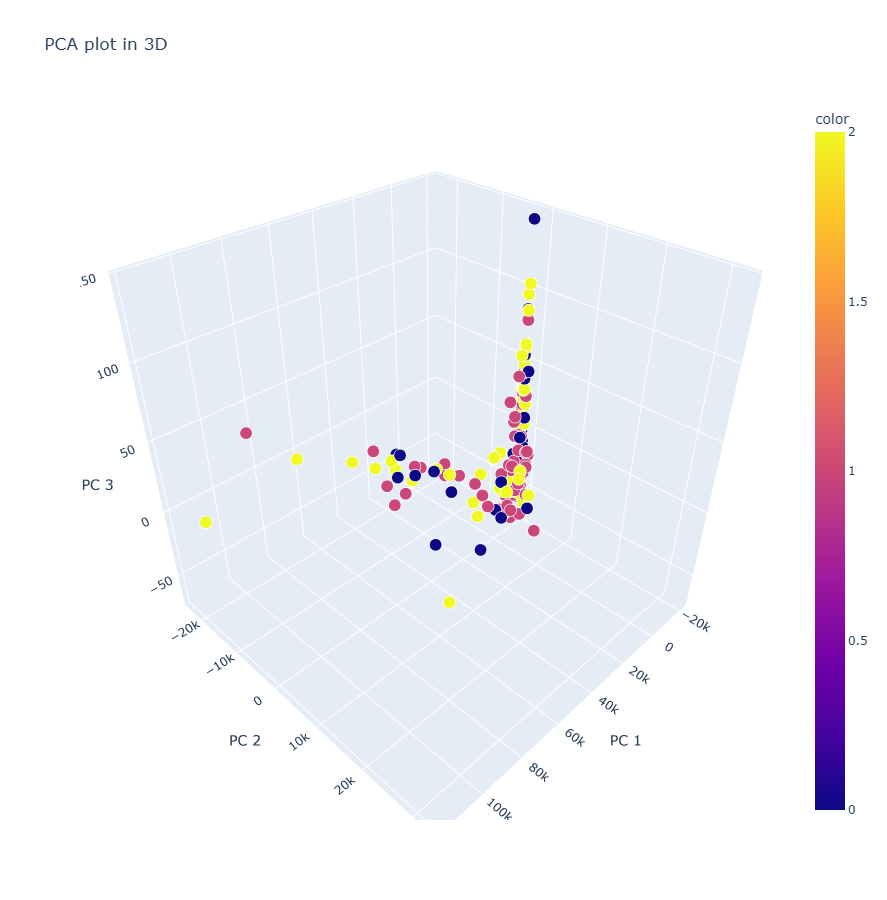

In [292]:
PCAplot3D(X, pred_sp)

In [293]:
spectral_labels = clustering_sp.fit_predict(X)
dbscan_calinski = calinski_harabasz_score(X, spectral_labels)

print('calinski_harabasz_score: ' + str(dbscan_calinski))

calinski_harabasz_score: 0.6772498036278332


##### Выбранная модель кластеризации - KMeans

In [295]:
country_df['cluster'] = pd.Series(pred_k)

In [296]:
country_df[country_df['cluster'].isna()].count()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
cluster       0
dtype: int64

In [297]:
country_df['cluster']

0      0
1      0
2      0
3      0
4      2
      ..
162    0
163    2
164    0
165    0
166    0
Name: cluster, Length: 167, dtype: int32

In [298]:
country_df['cluster'] = country_df['cluster'].astype(int)

In [299]:
country_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
 10  cluster     167 non-null    int32  
dtypes: float64(7), int32(1), int64(2), object(1)
memory usage: 13.8+ KB


In [300]:
X = country_df.iloc[:, [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]]

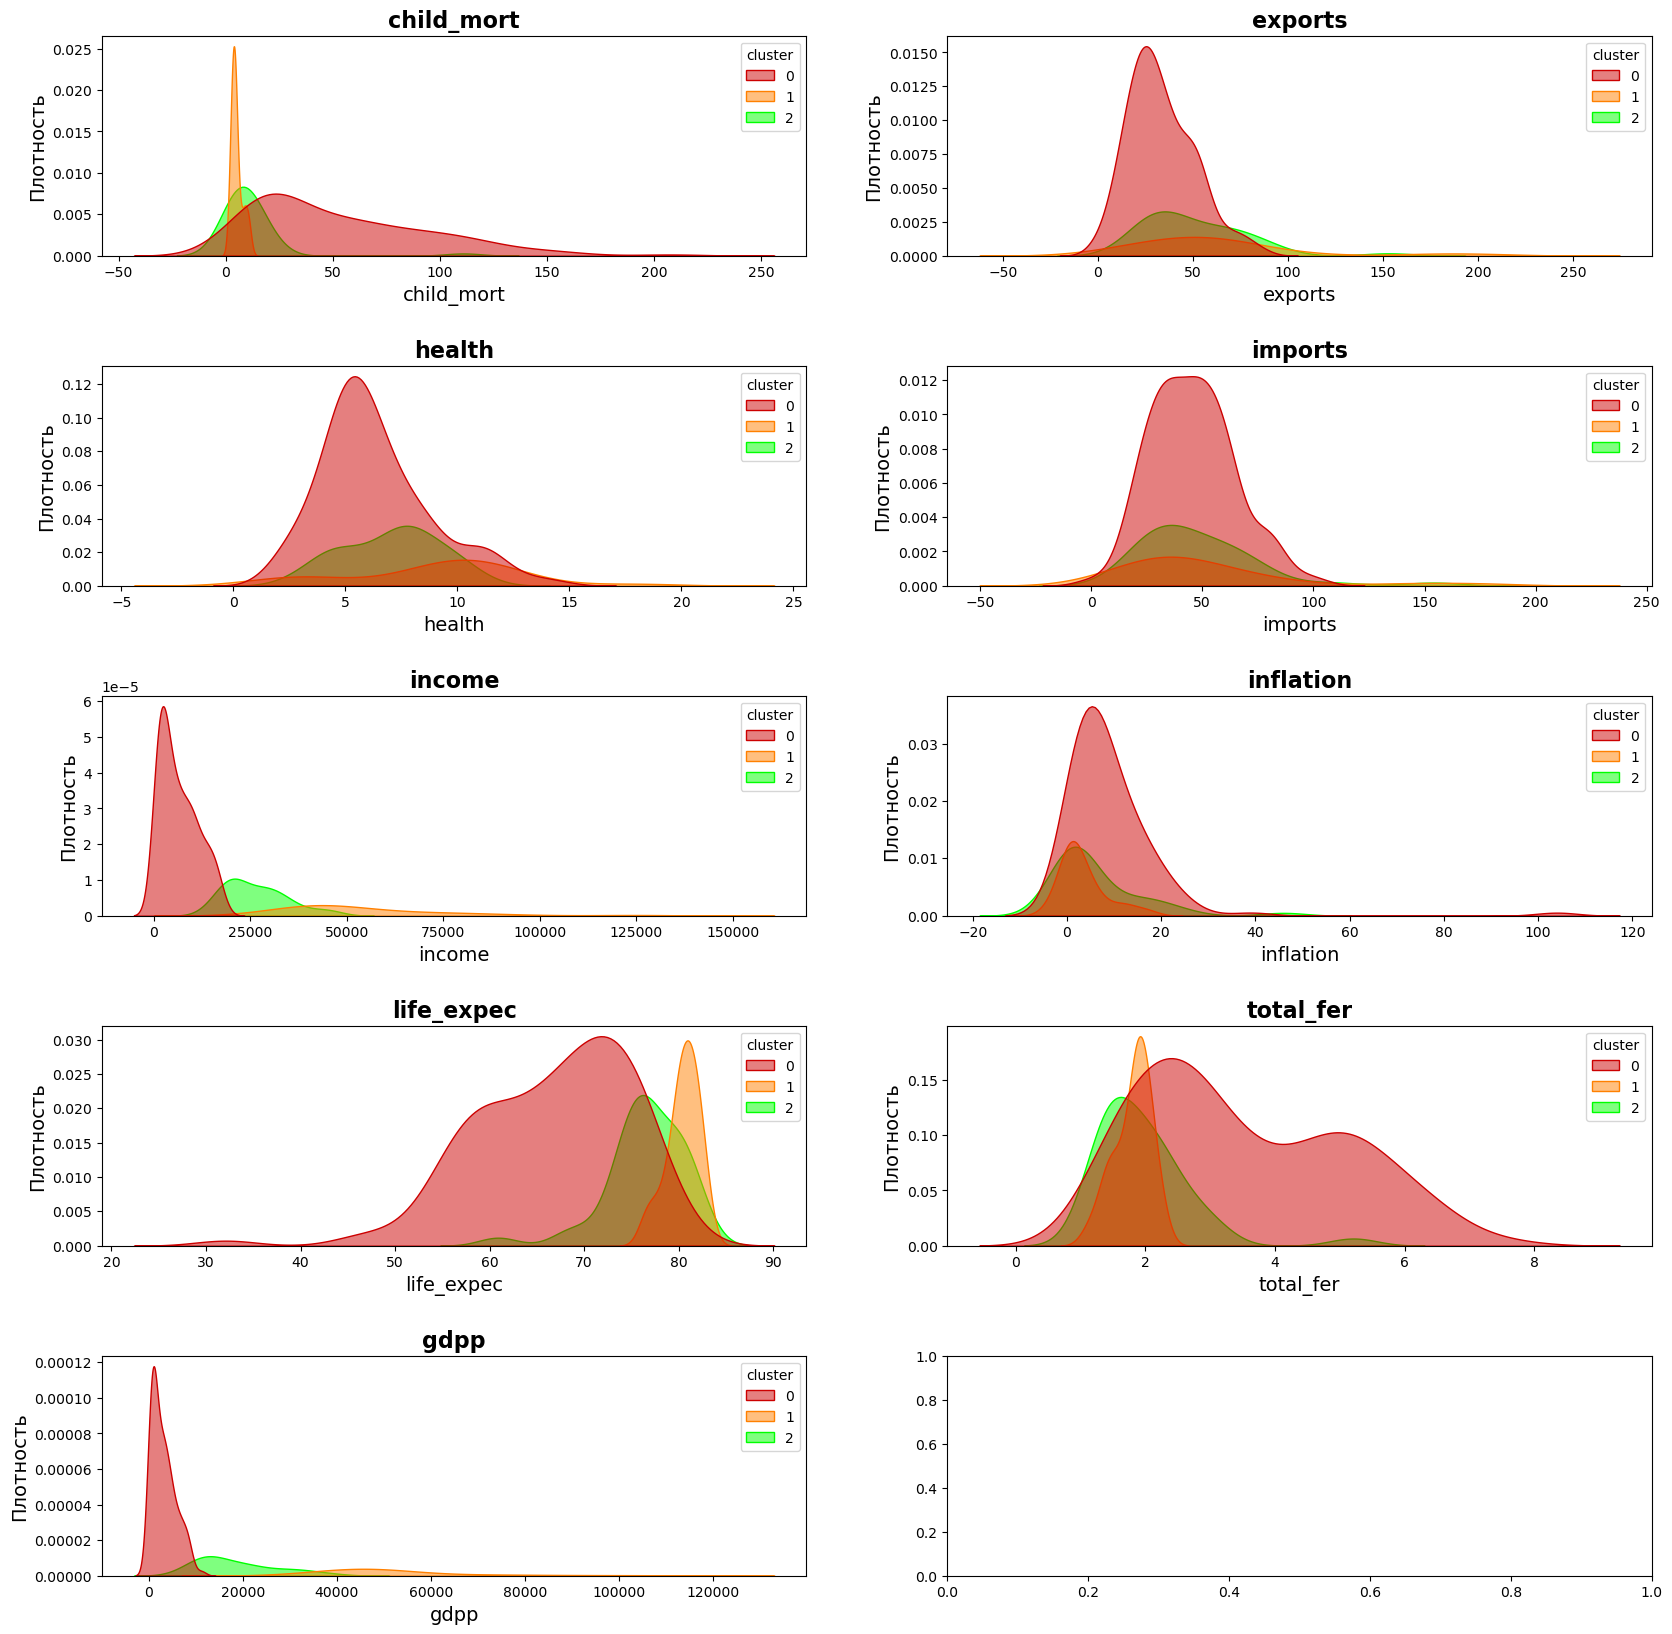

In [301]:
fig, axes = plt.subplots(5,2, figsize = (20,20))

# Расстояние между графиками
plt.subplots_adjust(hspace=0.5)

# Список значений признаков для цикла
columns = X.columns[0:-1]

# Строим распределения (kdeplot) для каждого признака
for i, column in enumerate(columns):
    ax = axes[i // 2, i % 2]
    sns.kdeplot(data = X,
                palette = ['#CC0000','#FF8000','#00FF00'],
                x = column,
                fill = True,
                alpha = 0.5,
                hue = 'cluster',
                ax = ax)
    
    ax.set_title(column, fontweight = 'bold', fontsize = 16)
    ax.set_xlabel(column, fontsize = 14)
    ax.set_ylabel('Плотность', fontsize = 14)
    

plt.show()

0 класс - бедные страны, 1 класс - богатые страны, 2 класс - развивающиеся страны

## Класификация

In [304]:
y = X['cluster']

#### Выбранные методы класификации:

KNeighborsClassifier

Random Forest Classifier

LINEAR DISCRIMINANT ANALYSIS

### KNeighborsClassifier (Классификация ближайших соседей)

In [308]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [309]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn_pred_test = knn.predict(X_test)

In [310]:
knn_f1 = f1_score(y_test, knn_pred_test, average='macro')
knn_f1

0.9563636363636364

In [311]:
class_names = ['Class 0', 'Class 1', 'Class 2']

In [312]:
conf_matrix_knn = confusion_matrix(y_test, knn_pred_test)
df_conf_matrix_knn = pd.DataFrame(conf_matrix_knn, index=class_names, columns=class_names)

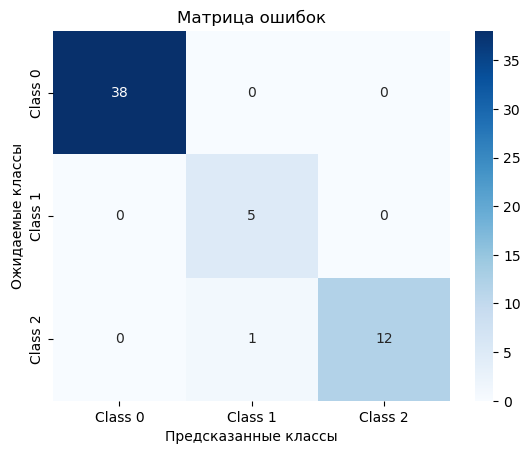

In [313]:
sns.heatmap(df_conf_matrix_knn, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Предсказанные классы')
plt.ylabel('Ожидаемые классы')
plt.title('Матрица ошибок')
plt.show()

### Random Forest Classifier (Классификатор случайного леса)

In [315]:
rfc  = RandomForestClassifier(criterion = 'gini',                                   
                                    max_depth = 5,
                                    random_state = 42,
                                    n_jobs = -1)

rfc.fit(X_train, y_train)
rfc_pred_test = rfc.predict(X_test)

In [316]:
rfc_f1 = f1_score(y_test, rfc_pred_test, average='macro')
rfc_f1

1.0

In [317]:
conf_matrix_rfc = confusion_matrix(y_test, rfc_pred_test)
df_conf_matrix_rfc = pd.DataFrame(conf_matrix_rfc, index=class_names, columns=class_names)

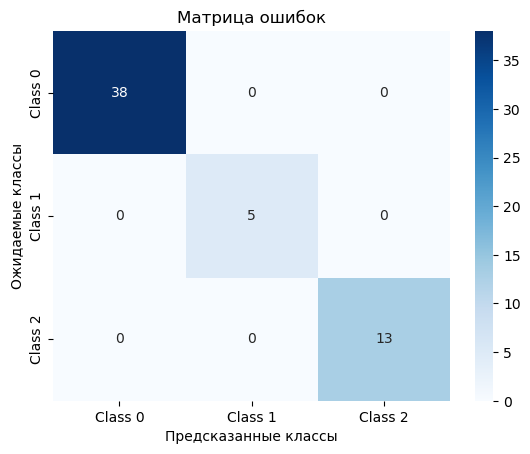

In [318]:
sns.heatmap(df_conf_matrix_rfc, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Предсказанные классы')
plt.ylabel('Ожидаемые классы')
plt.title('Матрица ошибок')
plt.show()

### Линейный дискрименантный анализ (LINEAR DISCRIMINANT ANALYSIS)

In [320]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [321]:
lda_pred_test = lda.predict(X_test)

In [322]:
lda_f1 = f1_score(y_test, lda_pred_test, average='macro')
lda_f1

0.7763347763347763

In [323]:
conf_matrix_lda = confusion_matrix(y_test, lda_pred_test)
df_conf_matrix_lda = pd.DataFrame(conf_matrix_lda, index=class_names, columns=class_names)

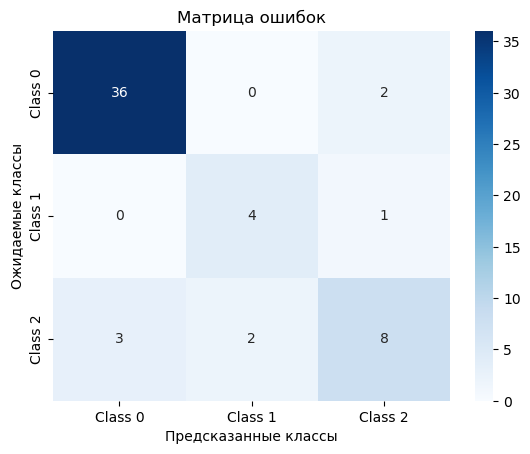

In [324]:
sns.heatmap(df_conf_matrix_lda, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Предсказанные классы')
plt.ylabel('Ожидаемые классы')
plt.title('Матрица ошибок')
plt.show()

#### Итог класификации:

Модель на основе случайного леса показала лучшие результаты

## Общиий вывод

1. Был загружен набор данных. Первые наблюдения показали, что пропусков нет, аномальные значения не имеются. Статистика показала, что значения во всех признаках находятся в пределах нормы.
2. Провели разведочный анализ данных. Наблюдается сильная зависимость между доходом и ввп на душу населения. Детская смертность коррелирует с рождаемостью и обратно коррелирует с продолжительностью жизни в стране.
3. Были обучены модели кластеризации. Была выбрана модель обученая на основе KMeans показавшая лучшую кластеризацию данных.
4. Была проведена класификация. Была выбрана модель случайного леса, показавшая лучший результат: 1.0.